1) Write a function (ideally in Python – but you can also use any other language) that generates an undirected growing network based on the K Nearest-Neighbors (KNN) rule, as follows:

–Start with a clique of n0 nodes that are randomly located in the Cartesian square S=[0,1]×[0,1].

–Grow the network by adding one node in each iteration.  The new node must be located at a randomly chosen location within S,  and it should be connected to its K nearest neighbors.

Use G=KNN model (n0, K, N) as the interface of your function, where N is the number of iterations and G is the final network.

In [235]:
import networkx as nx
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [449]:
def make_xy_clique_add_nodes_iter(N, n0, K):
    """
    This function makes a clique of n0 nodes, iteratively adds N number of nodes 1 at a time, and connects them to their
    K-nearest neighbors. All nodes are added randomly in the xy-plane ranging from 0 to 1.
    """
    
    # Make the clique of n0 nodes
    graph = nx.complete_graph(n0)
    num_nodes = nx.number_of_nodes(graph)
    for node_num in range(num_nodes):
        graph.node[node_num]['x'] = np.random.random_sample()
        graph.node[node_num]['y'] = np.random.random_sample()
        node_num +=1
        
    # Initialize a list of xy coordinates of the nodes, this will be updated as new nodes are added
    x_coord = list(nx.get_node_attributes(graph,'x').values())
    y_coord = list(nx.get_node_attributes(graph,'y').values())
    xy_coords = []
    for x,y in zip(x_coord, y_coord): 
        xy_coords.append([x, y])
    
    # Adds the new nodes 1 at a time, adds thie coords to xy_coords list, and connects them to their K-nearest neighbors
    # If K is larg
    new_node_num = n0 + N
    for node_num in range(n0, new_node_num):
        graph.add_node(node_num)
        graph.node[node_num]['x'] = np.random.random_sample()
        graph.node[node_num]['y'] = np.random.random_sample()
        xy_coords.append([graph.node[node_num]['x'], graph.node[node_num]['y']])
        if node_num < K: 
            num_nbrs = node_num    
        else: 
            num_nbrs = K
        nbrs = NearestNeighbors(n_neighbors=num_nbrs+1).fit(xy_coords)
        distances, indices = nbrs.kneighbors(xy_coords)
        for nbr in range(1, num_nbrs+1):
            nrst_nbr = indices[node_num][nbr]
            graph.add_edge(node_num, nrst_nbr)
    
    return graph

2) Using your KNN model function, construct networks with N=10000, n0=4 and K=4. Does this model generate scale-free networks?  Does it generate small-world networks?  Justify your answer with the appropriate graphs.

In [450]:
subin = make_xy_clique_add_nodes_iter(3,2,4)

In [451]:
x_coord = list(nx.get_node_attributes(subin,'x').values())
y_coord = list(nx.get_node_attributes(subin,'y').values())

In [452]:
xy_coords = []
for x,y in zip(x_coord, y_coord): xy_coords.append([x, y])

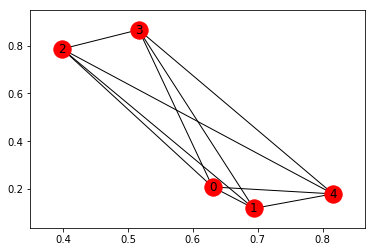

In [453]:
nx.draw_networkx(subin, xy_coords)

In [384]:
nbrs = NearestNeighbors(n_neighbors=4).fit(xy_coords)

In [385]:
distances, indices = nbrs.kneighbors(xy_coords)

In [386]:
indices

array([[ 0,  9, 11, 13],
       [ 1,  4,  8, 10],
       [ 2,  7,  8,  3],
       [ 3, 12, 13,  2],
       [ 4,  1,  8, 10],
       [ 5,  9,  6, 11],
       [ 6,  9,  5, 13],
       [ 7,  8,  2,  1],
       [ 8,  7,  1, 10],
       [ 9,  0, 11, 13],
       [10,  6,  5, 13],
       [11,  0,  9,  5],
       [12,  3, 13,  0],
       [13,  9,  0,  6]], dtype=int64)

In [288]:
distances

array([[ 0.        ,  0.1729035 ],
       [ 0.        ,  0.09066888],
       [ 0.        ,  0.22578937],
       [ 0.        ,  0.30127249],
       [ 0.        ,  0.01251242],
       [ 0.        ,  0.01251242],
       [ 0.        ,  0.22578937],
       [ 0.        ,  0.1729035 ],
       [ 0.        ,  0.30768277],
       [ 0.        ,  0.2691772 ],
       [ 0.        ,  0.09066888],
       [ 0.        ,  0.15022673]])

In [234]:
subin.node

{0: {'x': 0.35111998058721605, 'y': 0.5983731439055976},
 1: {'x': 0.8273335439111225, 'y': 0.5341071605596669},
 2: {'x': 0.4964405094932087, 'y': 0.39016785768280837},
 3: {'x': 0.4387144553950242, 'y': 0.3512889170815998},
 4: {'x': 0.6982300760318367, 'y': 0.44546311195088195},
 5: {'x': 0.2116595213791681, 'y': 0.5143363438281983},
 6: {'x': 0.3082594883796508, 'y': 0.19652741892704229},
 7: {'x': 0.042431186824652856, 'y': 0.9539586957654326},
 8: {'x': 0.7684445099440728, 'y': 0.18450832813866702},
 9: {'x': 0.4529524864300055, 'y': 0.029067101467806333},
 10: {'x': 0.3920370131259898, 'y': 0.8385090588521024},
 11: {'x': 0.3258702667198209, 'y': 0.9121132252308383}}

In [230]:
list(zip(x_coord,y_coord))

[(0.16558974771002366, 0.2463593107114932),
 (0.32377437844510315, 0.8488708717956476),
 (0.7853791057573543, 0.5885424740898371),
 (0.645610453736517, 0.9156681937936846),
 (0.8107113389268236, 0.034668724431791476),
 (0.8054554502632546, 0.023313712978112133),
 (0.5627222169037119, 0.6260224543704962),
 (0.09190082756141504, 0.08994458935656924),
 (0.09948277782846782, 0.5468564877240771),
 (0.9720895527609776, 0.3946466930729724),
 (0.23331176143966026, 0.8549832772237355),
 (0.1903773783580448, 0.9989440632904119)]

In [193]:
test.node

{0: {}, 1: {}, 2: {}, 3: {}, 4: {}}

In [130]:
def add_random_xy_coords_to_graph(graph):
    num_nodes = nx.number_of_nodes(graph)
    for node_num in range(num_nodes):
        graph.node[node_num]['x'] = np.random.random_sample()
        graph.node[node_num]['y'] = np.random.random_sample()
        node_num +=1

In [ ]:
def add_nodes_to_KNN(graph, num_new_nodes):
    while new_node_num in range(num_new_nodes):
        graph.add_node(1)
    
    

In [170]:
def make_graph(name):
    name = nx.Graph()
    name.add_node(1)
    return name

In [176]:
that = make_clique_with_random_xy(5)

In [177]:
that.node

{0: {'x': 0.4307270753886475, 'y': 0.7003919555095213},
 1: {'x': 0.5421093650428127, 'y': 0.5212835671435303},
 2: {'x': 0.5416318595253203, 'y': 0.4548315715482548},
 3: {'x': 0.9508612873132484, 'y': 0.03362512541069196},
 4: {'x': 0.2872954073899425, 'y': 0.11146367285279468}}

In [164]:
graph = make_clique_with_random_xy(5)

In [165]:
graph.node

AttributeError: 'NoneType' object has no attribute 'node'

In [138]:
test.node

{0: {'x': 0.27717088558579395, 'y': 0.43098717270618503},
 1: {'x': 0.4893710244239522, 'y': 0.17499545526446425},
 2: {'x': 0.9818153589481512, 'y': 0.5147395898122684},
 3: {'x': 0.7694077380882501, 'y': 0.8736222307036045},
 4: {'x': 0.4584737428844764, 'y': 0.4771793963259664}}

In [142]:
test.add_node(5)

In [143]:
test.node

{0: {'x': 0.27717088558579395, 'y': 0.43098717270618503},
 1: {'x': 0.4893710244239522, 'y': 0.17499545526446425},
 2: {'x': 0.9818153589481512, 'y': 0.5147395898122684},
 3: {'x': 0.7694077380882501, 'y': 0.8736222307036045},
 4: {'x': 0.4584737428844764, 'y': 0.4771793963259664},
 5: {}}

In [53]:
G=nx.Graph()

In [54]:
generate_random_clique(G, 50)

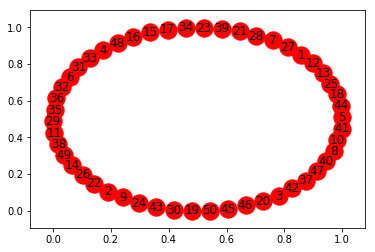

In [55]:
nx.draw_networkx(G)

In [69]:
G.node[1]['x']

0.9316607713683318

In [79]:
nx.get_node_attributes(G, 'x')[1]

0.9316607713683318

In [74]:
x_coord = (x for x in G if G.node[n]['x'])

In [75]:
x_coord

<generator object <genexpr> at 0x000001661B224E08>

In [84]:
clique=nx.complete_graph(0)

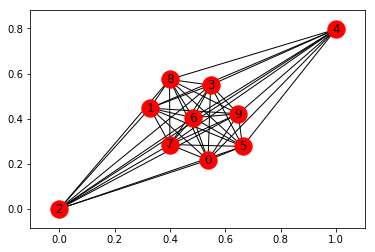

In [85]:
nx.draw_networkx(clique)

In [ ]:
def add_node_in_square_randomly (num_nodes):
    